# Website Phishing Project
## Rohan Jaggannagari, Ansuman Nayak

## Import Statements

In [5]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

## Data Cleaning
The data for the most part is clean, but need to make sure that it works the supervised ML models

In [6]:
# Clean up the data
website_df = pandas.read_csv("data.csv", on_bad_lines='skip')
website_df = website_df.drop(columns = ['# `rec_id`', ' `website`' , ' `created_date` '])
website_df = website_df.rename(columns = {' `url`': 'website_url', ' `result`': 'result'})
website_df = website_df[~website_df.apply(lambda row: row.astype(str).str.contains('result', case = False).any(), axis = 1)]

# Only use half of the data
sample_size = int(0.25 * len(website_df))
website_df = website_df.sample(sample_size, random_state = 42)

## Data Processing
Break the data into the URL and if it is valid

In [7]:
# Break into categories
X = website_df['website_url']
y = website_df['result']

# Break the set into 30 percent test and 70 percent training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Vectorize the data that was a string
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Supervised ML Models

Model: RandomForestClassifier
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3725
           1       0.91      0.84      0.87      2252

    accuracy                           0.91      5977
   macro avg       0.91      0.89      0.90      5977
weighted avg       0.91      0.91      0.91      5977

----------------------------------------


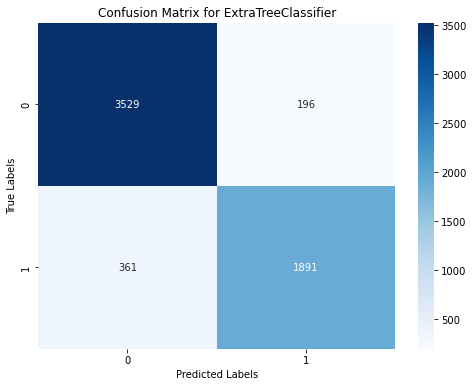

Model: GradientBoostingClassifier
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3725
           1       0.88      0.74      0.80      2252

    accuracy                           0.86      5977
   macro avg       0.87      0.84      0.85      5977
weighted avg       0.87      0.86      0.86      5977

----------------------------------------


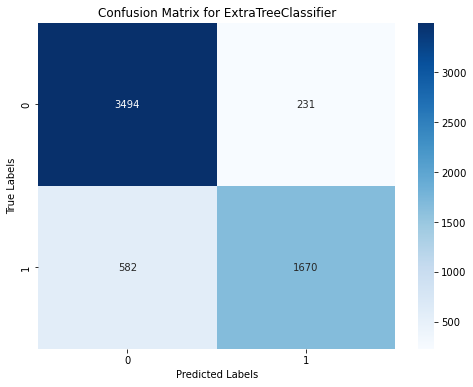

Model: AdaBoostClassifier
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3725
           1       0.86      0.76      0.81      2252

    accuracy                           0.86      5977
   macro avg       0.86      0.84      0.85      5977
weighted avg       0.86      0.86      0.86      5977

----------------------------------------


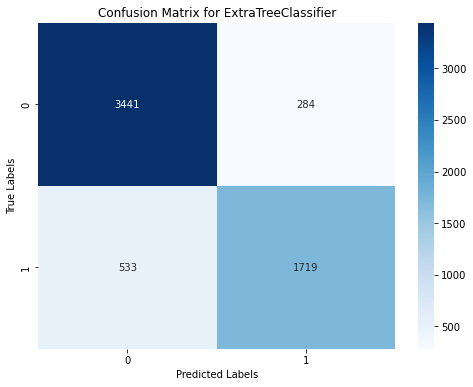

Model: ExtraTreesClassifier
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3725
           1       0.92      0.85      0.88      2252

    accuracy                           0.91      5977
   macro avg       0.92      0.90      0.91      5977
weighted avg       0.91      0.91      0.91      5977

----------------------------------------


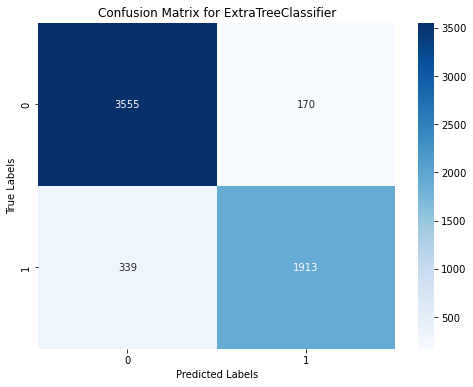

Model: LogisticRegression
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3725
           1       0.90      0.86      0.88      2252

    accuracy                           0.91      5977
   macro avg       0.91      0.90      0.90      5977
weighted avg       0.91      0.91      0.91      5977

----------------------------------------


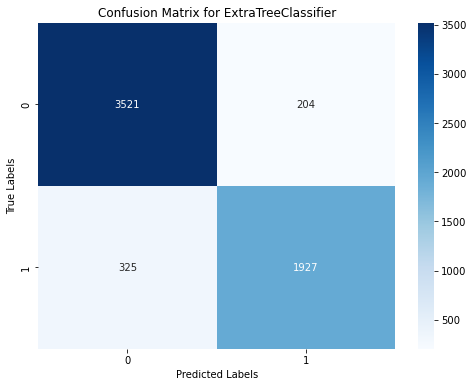

Model: RidgeClassifier
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3725
           1       0.92      0.89      0.91      2252

    accuracy                           0.93      5977
   macro avg       0.93      0.92      0.93      5977
weighted avg       0.93      0.93      0.93      5977

----------------------------------------


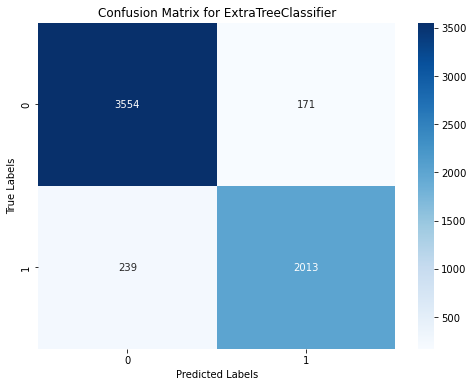

Model: SVC
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3725
           1       0.92      0.89      0.90      2252

    accuracy                           0.93      5977
   macro avg       0.93      0.92      0.92      5977
weighted avg       0.93      0.93      0.93      5977

----------------------------------------


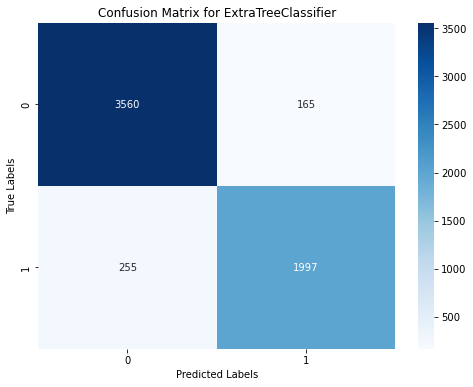

Model: MultinomialNB
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3725
           1       0.96      0.83      0.89      2252

    accuracy                           0.92      5977
   macro avg       0.93      0.91      0.92      5977
weighted avg       0.93      0.92      0.92      5977

----------------------------------------


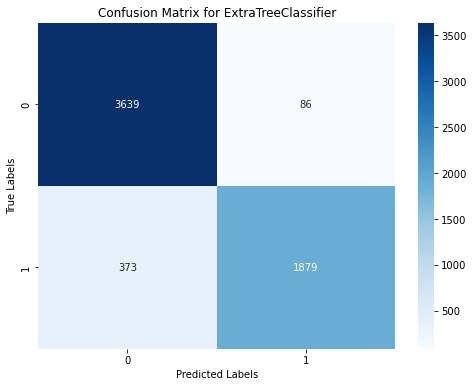

Model: BernoulliNB
Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3725
           1       0.96      0.76      0.85      2252

    accuracy                           0.90      5977
   macro avg       0.92      0.87      0.89      5977
weighted avg       0.91      0.90      0.90      5977

----------------------------------------


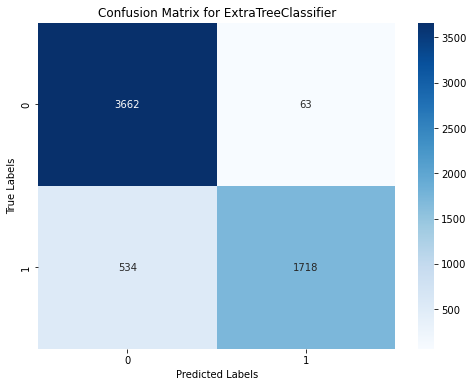

Model: ComplementNB
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3725
           1       0.92      0.89      0.91      2252

    accuracy                           0.93      5977
   macro avg       0.93      0.92      0.92      5977
weighted avg       0.93      0.93      0.93      5977

----------------------------------------


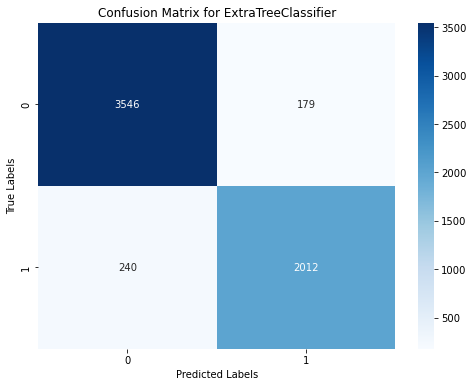

Model: DecisionTreeClassifier
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3725
           1       0.85      0.77      0.80      2252

    accuracy                           0.86      5977
   macro avg       0.86      0.84      0.85      5977
weighted avg       0.86      0.86      0.86      5977

----------------------------------------


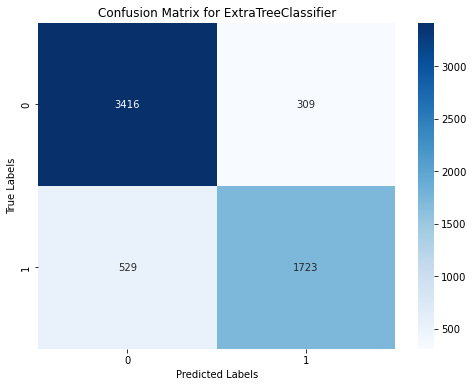

Model: ExtraTreeClassifier
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      3725
           1       0.84      0.75      0.79      2252

    accuracy                           0.85      5977
   macro avg       0.85      0.83      0.84      5977
weighted avg       0.85      0.85      0.85      5977

----------------------------------------


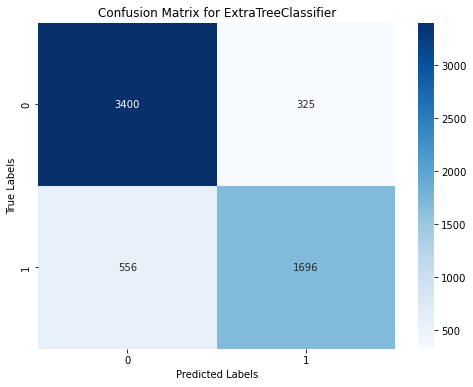

In [11]:
# Supervised ML models that are going to be used
supervised_models = [RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), ExtraTreesClassifier(),
    LogisticRegression(), RidgeClassifier(), SVC(), MultinomialNB(), BernoulliNB(), ComplementNB(), DecisionTreeClassifier(),
    ExtraTreeClassifier()]

# Train and evaluate each model
for model in supervised_models:
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy:.2f}')
    print(report)
    print('-' * 40)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

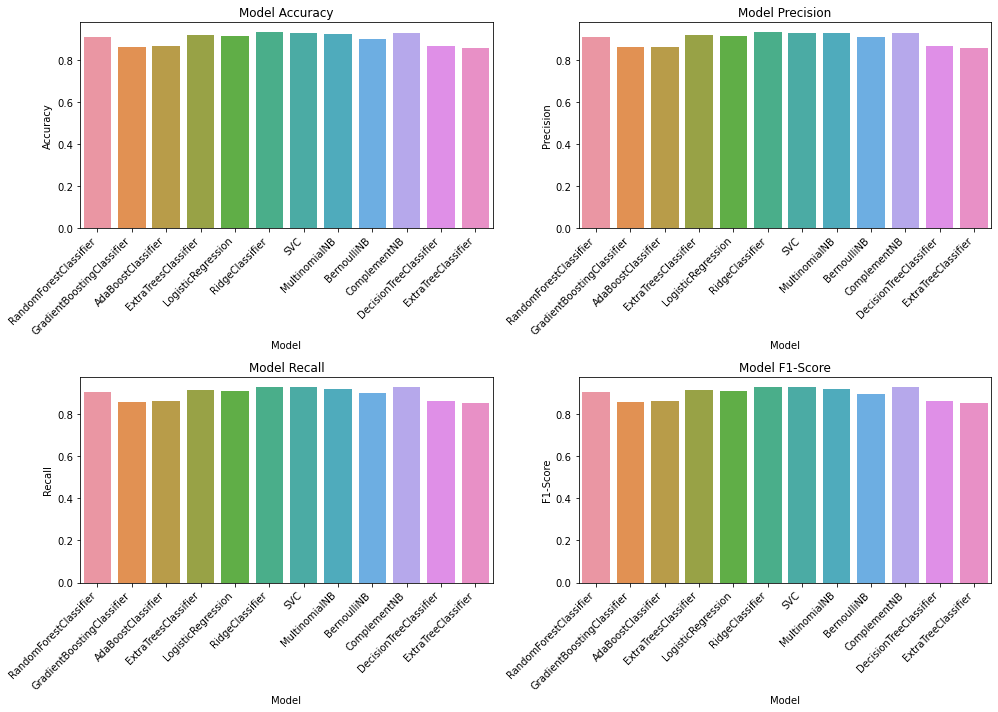

In [10]:
# Create empty lists to store metric values
model_names = []
accuracies = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate each model
for model in supervised_models:
    model_name = model.__class__.__name__
    model_names.append(model_name)
    
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    accuracies.append(accuracy)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])

# Create a DataFrame for the metrics
metrics_df = pandas.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

# Create subplots for metrics visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Bar plot for Accuracy
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0, 0])
axes[0, 0].set_title('Model Accuracy')

# Bar plot for Precision
sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0, 1])
axes[0, 1].set_title('Model Precision')

# Bar plot for Recall
sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[1, 0])
axes[1, 0].set_title('Model Recall')

# Bar plot for F1-Score
sns.barplot(x='Model', y='F1-Score', data=metrics_df, ax=axes[1, 1])
axes[1, 1].set_title('Model F1-Score')

# Adjust plot layout
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
plt.tight_layout()
plt.show()